# その他のデータフレーム操作

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame

### DataFrame を array に変換する例です。

In [2]:
data = {'City': ['Tokyo','Osaka','Nagoya','Okinawa'],
                 'Temperature': [25.0,28.2,27.3,30.9],
                 'Humidity': [44,42,np.nan,62]}
cities = DataFrame(data)
cities

,City,Humidity,Temperature
0,Tokyo,44.0,25.0
1,Osaka,42.0,28.2
2,Nagoya,NaN,27.3
3,Okinawa,62.0,30.9


In [3]:
cities.as_matrix()

array([['Tokyo', 44.0, 25.0],
       ['Osaka', 42.0, 28.2],
       ['Nagoya', nan, 27.3],
       ['Okinawa', 62.0, 30.9]], dtype=object)

### Series を array に変換する例です。

In [4]:
cities['City'].as_matrix()

array(['Tokyo', 'Osaka', 'Nagoya', 'Okinawa'], dtype=object)

### トランプのカードを集めた DataFrame を定義して、カードのシャッフルを行う例です。

In [5]:
face = ['king','queen','jack','ten','nine','eight',
        'seven','six','five','four','three','two','ace']

suit = ['spades', 'clubs', 'diamonds', 'hearts']

value = range(13,0,-1)

deck = DataFrame({'face': np.tile(face,4),
                  'suit': np.repeat(suit,13),
                  'value': np.tile(value,4)})

deck.head()

,face,suit,value
0,king,spades,13
1,queen,spades,12
2,jack,spades,11
3,ten,spades,10
4,nine,spades,9


permutation 関数で、index の順番をランダムにシャッフルします。

In [6]:
np.random.permutation(deck.index)

array([36, 47, 25,  3, 22, 45, 29, 40, 44, 37, 39, 32, 43, 19, 50,  2, 30,
       48, 27,  6, 17, 10, 46, 41, 21,  5, 42, 49, 16,  4, 15, 13, 31, 34,
       20, 14, 51, 33, 11, 24,  0, 35, 23, 28,  9,  8, 38,  7, 26, 18, 12,
        1])

ランダムにシャッフルした index を用いて行を並べ替えます。

In [7]:
deck = deck.reindex(np.random.permutation(deck.index))
deck.head()

,face,suit,value
31,eight,diamonds,8
40,queen,hearts,12
19,seven,clubs,7
2,jack,spades,11
20,six,clubs,6


reset_index メソッドで index に通し番号を付け直します。

In [8]:
deck = deck.reset_index(drop=True)
deck.head()

,face,suit,value
0,eight,diamonds,8
1,queen,hearts,12
2,seven,clubs,7
3,jack,spades,11
4,six,clubs,6


### DataFrame のグラフ描画機能を使用する例です。

3回分のランダムウォークのデータを並べた DataFrame を作成します。

In [9]:
result = DataFrame()
for c in range(3):
    y = 0
    t = []
    for delta in np.random.normal(loc=0.0, scale=1.0, size=100):
        y += delta
        t.append(y)
    result['Trial %d' % c] = t

result.head()

,Trial 0,Trial 1,Trial 2
0,0.801200,-0.732828,0.163123
1,2.457965,-1.705523,1.025830
2,3.928955,-2.429399,1.675348
3,4.553545,-2.375031,1.456693
4,4.042278,-1.807057,1.713673


DataFrame の polot メソッドでグラフを描きます。

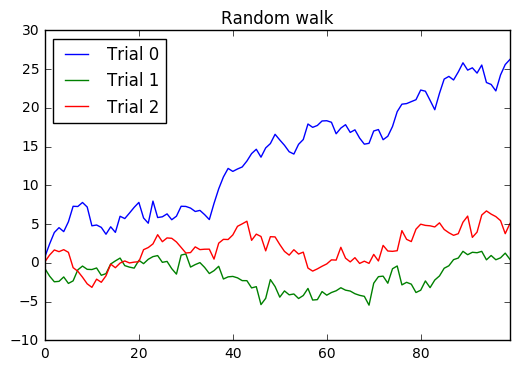

In [10]:
result.plot(title='Random walk')

## 練習問題

次の関数 coin_game は、所持金と掛け金を引数に渡すと、1/2の確率で掛け金の分だけ所持金が増減した値が返ります。

In [11]:
from numpy.random import randint
def coin_game(money, bet):
    coin = randint(2)
    if coin == 0:
        money += bet
    else:
        money -= bet
    return money

次は、1000円の所持金において、100円を賭けた場合の結果を示します。

In [12]:
money = 1000
money = coin_game(money, 100)
money

1100

(1) 所持金1000円からスタートして、所持金の50%を賭け続けた場合の所持金の変化をリスト trial に格納してください。（全部で100回繰り返します。）

(2) (1)の処理を3回繰り返して、それぞれの結果を列（trial0, trial1, trial2）とするDataFrameを作成して、変数 df に格納してください。また、その結果をグラフ表示してください。

(3) 関数 coin_game を修正して、1/2の確率で「掛け金の分だけ所持金が増加する」もしくは「掛け金の半分だけ所持金が減少」ようにしてください。修正後の関数名は stock_game とします。（これは、掛け金の分だけ株を購入したところ、1/2の確率が株価が倍、もしくは、半分になる状況をシュミレーションしています。）

(4) (3)の関数を用いて、(2)と同様のグラフを作成してください。